### CS/ECE/ISyE 524 — Introduction to Optimization — Spring 2018
# Fantasy Baseball Roster Optimizer
## Brian Broeking (broeking@wisc.edu)

# 1. Introduction 

As fantasy sports grew in popularity over the course of the 2000's, players became dissatisfied in the season long format. Injuries to key players could take your team out of contention early in the season. Players demanded a more flexible fantasy format and daily fantasy sports were born. 

Draftkings is one of the major providers of daily fantasy sports in the United States. Everyday, Draftkings runs online competitions where between 2 to 50,000+ people compete to build the best fantasy baseball lineup for that day. The best lineups are formed by rostering players who perform well in live Major League Baseball games during that day and in turn score points for the lineup.

<img src="ReportResources/contest.png"/>

[Draftkings](https://www.draftkings.com/lobby) provides many different tournament formats for players to choose, but for this project we will focus on the GPP tournaments also known as Guarentee Prize Pool tournaments.  These tournaments have top heavy prizing where players placing in the top 2-5 percent receive a vast majority of the reward compared to the rest of the entrants. 

<img src="ReportResources/prizing.png" />

We sought to discover methods of creating optimal lineups based on projected fantasy points generated by [SaberSim,](https://www.fangraphs.com/dailyprojections.aspx?pos=all&stats=bat&type=sabersim&team=0&lg=all&players=0) a fantasy baseball statistics organization. Using those projected points as a baseline, we combine the projections with Draftkings lineup builder csv to build lineups like the one pictured below.

<img src="ReportResources/entry.png" />

# 2. Mathematical Model


This model is a linear program with binary variables. The goal is to generate multiple lineups in order to optimize the number of hits our lineups get. First, we define the salary cap as the amount of money each player is given to create a lineup for their team. Each player is given a $50,000 cap per team. Call this variable "SalaryCap." 


We also need to have a way to represent if a player is picked in each team. This is done by having binary constraints for our variable. Call this variable "$x_i$." If the $i^{th}$ player is in the lineup, it is represented with a 1 and if not, a 0. We have "n" of these variables to represent the number of players on the roster. The positions they fill on the lineup are two pitchers, a catcher, first, second, and third basemen, short stop, and three outfielders. Represent these positions by "P," "C," "1B," "2B," "3B," "SS," and "OF." There are only 10 positions to be filled, so our first constraint will be the following:

\begin{equation}
\sum_{i=1}^{n}x_i=10
\end{equation}

$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad x_i \in \{0,1\}$



We now define "s" to be the vector that determines the salaries of each of the players. By taking the transpose of the row vector, x, and multiply it by the row vector, s. We should get the amount of money we spend for all of the players. We represent this by taking the sum of the products of the $i^{th}$ elements for x and s. This value should be less or equal to the salary cap. This is our first constraint:


\begin{equation} 
 \sum_{i=1}^{n} x_i *s_i\leq SalaryCap    
\end{equation}



We have another constraint where we don't allow a batter to play against a pitcher if the pitcher is being played. The primary goal with this model is to maxamize the scoring for a given lineup. We use this constraint because otherwise, there is a negative correlation between a batter and a pitcher. That is, if the batter scores points for getting a hit or the pitcher scores points for striking a batter out, the other player loses points because they've failed to get a hit or strike a batter out. Let the variable "np" be an array of teams such that they oppose our pitcher. Let $pT_i$ be the team, for which the player batting plays. Therefore, we impose the following constraint:

\begin{equation} 
(x_i +x_j)\leq 1 \quad \forall (i) \in \{1,2\} \quad \forall j \in \{1,\dots, np[pT_i]\}\}
\end{equation}         



We now need a way to control how many players can come from a certain team. Baseball is a very volatile sport. It's hard to know whether a certain player will do well or not on a given day regardless of how well they play during the season. However, team synergy is something we may control without needing to spend more money from the salary cap. We also need to consider the fact that we can not have more than 5 hitters per team in the lineup.  Let "NT" denote the number of teams in the MLB. Now define "$T_{m_i}$" as a binary variable where  $T_{m_i}$ is 1 if player i on team m is in the lineup and 0 otherwise. We now create a constraint to be able to have at least 4 players from one team so that we may allow for more synergy, while also respecting the rule from Draftkings saying we can not exceed 5 hitters from any one team. The following constraint represents this. 
\begin{equation}
\sum_{i=1}^{n} T_{m_i}*x_i\geq 4  \quad \exists m \in\{1, \dots, NT\}
\end{equation}

\begin{equation}
\sum_{i=1}^{n}\sum_{m=1}^{NT}T_{m_i}*x_i\leq  5  
\end{equation}

$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad  \quad \quad \quad \quad \ T_{m_i} \in \{0,1\}$
  
Finally, we have our multiple lineups stacking constaint. This constraint is run after the first lineup for the purpose of making sure the ten teams we are stacking are limited to the amount of overlapping between lineups. Let "LU" be the previously generated lineups. We don't want the number of overlaps between lineups to be more than 7. Call this number "NumOverlap." 


\begin{equation}
\sum_{j=1}^{10} (x[LU_{ij}] \leq NumOverlap \quad \forall i \in \{1, \dots, length(LU)\}
\end{equation}



We want to maximize the projected points for a given daily lineup. Let "$pP_i $" be the projected points a player scores. Thus our model becomes the following:


**Maximize:** 
\begin{equation}
 \sum_{i=1}^{n} x_i*pP_i 
\end{equation}
        
                
**Subject to:**
 
          
  \begin{equation}
  \sum_{i=1}^{n} x_i*s_i\leq SalaryCap 
  \end{equation} 
  \begin{equation}
\sum_{i=1}^{n}x_i=10
\end{equation}

 \begin{equation}
   \sum_{i \in P} x_i= 2,
   \sum_{i \in OF} x_i= 3,
\sum_{i \in SS} x_i= 1,\sum_{i \in 1B} x_i= 1,
 \sum_{i \in 2B} x_i= 1,  \sum_{i \in 3B} x_i= 1
\end{equation}

\begin{equation}
  \sum_{i=1}^{n} T_{m_i}*x_i \geq 4   \quad  \exists m \in \{1, \dots, NT\}
\end{equation}

\begin{equation}
\sum_{i=1}^{n}\sum_{m=1}^{NT}T_{m_i}*x_i\leq  5  
\end{equation}

\begin{equation} 
(x_i +x_j)\leq 1 \quad \forall (i) \in \{1,2\} \quad \forall j \in \{1,\dots, np[pT_i]\}\}
\end{equation}      


\begin{equation}
\sum_{j=1}^{10} (x[LU_{ij}] \leq NumOverlap \quad \forall i \in \{1, \dots, length(LU)\}
\end{equation}


$\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad T_{m_i}*x_i \in \{0,1\}$
$x_i \in \{0,1\}$


# 3. Solutions
## Splitting input CSV file we generate in Java

In [188]:
using JuMP, Cbc, NamedArrays

raw = readcsv("output5.6.csv");

# Reading the join csv we generated in Java
# Player Names
names = raw[:,1];
#Player Salaries
salaries = raw[:,2];
# Positions the player plays
position = raw[:, 3];
# Projected points from SaberSim
projectedPoints = raw[:,4];
# Average points from their last 5 outings
averagePoints = raw[:,5];
# Team the player plays for
playerTeam = raw[:,6];
#Team the player is playing against
opponentTeam = raw[:,7];
# Number of unique players
n = length(names)

95

## Player position eligibilities
Each player is able to play one or more positions. These arrays represent the players that can play the 
specific position

In [189]:
# Array that holds the index of each player able to play the position that day
# Positional Array
pitchers = Int64[]
catchers = Int64[]
first = Int64[]
second = Int64[]
third = Int64[]
shortStop = Int64[]
fielders = Int64[]

# Adds player to a positional array 
for i in 1:n
 if contains(position[i], "P")
  append!(pitchers, i)
 end
 if contains(position[i], "C")
  append!(catchers, i)
 end
 if contains(position[i], "1B")
  append!(first, i)
 end
 if contains(position[i], "2B")
  append!(second, i)
 end
 if contains(position[i], "3B")
  append!(third, i)
 end
 if contains(position[i], "SS")
  append!(shortStop, i)
 end
 if contains(position[i], "OF")
  append!(fielders, i)
 end
end

## Creates team arrays
Each of these arrays represents the array of players that play for the specified team

In [190]:
# NL East
phillies = Int64[]
atlanta = Int64[]
miami = Int64[]
washington = Int64[]
mets = Int64[]

# AL East
yankees = Int64[]
baltimore = Int64[]
tampa = Int64[]
boston = Int64[]
toronto = Int64[]

# NL Central
milwaukee = Int64[]
pittsburg = Int64[]
reds = Int64[]
cardinals = Int64[]
chicago = Int64[]

# AL Central
whitesox = Int64[]
royals = Int64[]
tigers = Int64[]
cleveland = Int64[]
twins = Int64[]

# AL West
seattle = Int64[]
angels = Int64[]
oakland = Int64[]
houston = Int64[]
texas = Int64[]

# NL West
dodgers = Int64[]
arizona = Int64[]
padres = Int64[]
giants = Int64[]
rockies = Int64[]

0-element Array{Int64,1}

In [191]:
# NL East
for i in 1:n
 if contains(playerTeam[i], " PHI")
  append!(phillies, i)
 end
 if contains(playerTeam[i], " ATL")
  append!(atlanta, i)
 end
 if contains(playerTeam[i], " MIA")
  append!(miami, i)
 end
 if contains(playerTeam[i], " WAS")
  append!(washington, i)
 end
 if contains(playerTeam[i], " NYM")
  append!(mets, i)
 end
    
# AL East
 if contains(playerTeam[i], " NYY")
  append!(yankees, i)
 end
 if contains(playerTeam[i], " BAL")
  append!(baltimore, i)
 end
 if contains(playerTeam[i], " TB")
  append!(tampa, i)
 end
 if contains(playerTeam[i], " BOS")
  append!(boston, i)
 end
 if contains(playerTeam[i], " TOR")
  append!(toronto, i)
 end
    
 # NL Central
 if contains(playerTeam[i], " MIL")
  append!(milwaukee, i)
 end
 if contains(playerTeam[i], " PIT")
  append!(pittsburg, i)
 end
 if contains(playerTeam[i], " CIN")
  append!(reds, i)
 end
 if contains(playerTeam[i], " STL")
  append!(cardinals, i)
 end
 if contains(playerTeam[i], " CHC")
  append!(chicago, i)
 end
    
# AL Central
  if contains(playerTeam[i], " CWS")
  append!(whitesox, i)
 end
 if contains(playerTeam[i], " KCR")
  append!(royals, i)
 end
 if contains(playerTeam[i], " CLE")
  append!(cleveland, i)
 end
 if contains(playerTeam[i], " DET")
  append!(tigers, i)
 end
 if contains(playerTeam[i], " MIN")
  append!(twins, i)
 end

 if contains(playerTeam[i], " SEA")
  append!(seattle, i)
 end
 if contains(playerTeam[i], " LAA")
  append!(angels, i)
 end
 if contains(playerTeam[i], " OAK")
  append!(oakland, i)
 end
 if contains(playerTeam[i], " HOU")
  append!(houston, i)
 end
 if contains(playerTeam[i], " TEX")
  append!(texas, i)
 end
    
 if contains(playerTeam[i], " LAD")
  append!(dodgers, i)
 end
 if contains(playerTeam[i], " ARI")
  append!(arizona, i)
 end
 if contains(playerTeam[i], " SD")
  append!(padres, i)
 end
 if contains(playerTeam[i], " SF")
  append!(giants, i)
 end
 if contains(playerTeam[i], " COL")
  append!(rockies, i)
 end

end

## Creates team opponent arrays
Each of these arrays represents the array of players that are playing against the named team that day

In [192]:
# NL East
oppphillies = Int64[]
oppatlanta = Int64[]
oppmiami = Int64[]
oppwashington = Int64[]
oppmets = Int64[]

# AL East
oppyankees = Int64[]
oppbaltimore = Int64[]
opptampa = Int64[]
oppboston = Int64[]
opptoronto = Int64[]

# NL Central
oppmilwaukee = Int64[]
opppittsburg = Int64[]
oppreds = Int64[]
oppcardinals = Int64[]
oppchicago = Int64[]

# AL Central
oppwhitesox = Int64[]
opproyals = Int64[]
opptigers = Int64[]
oppcleveland = Int64[]
opptwins = Int64[]

# AL West
oppseattle = Int64[]
oppangels = Int64[]
oppoakland = Int64[]
opphouston = Int64[]
opptexas = Int64[]

# NL West
oppdodgers = Int64[]
opparizona = Int64[]
opppadres = Int64[]
oppgiants = Int64[]
opprockies = Int64[]

0-element Array{Int64,1}

In [193]:
# NL East
for i in 1:n
 if contains(opponentTeam[i], " PHI")
  append!(oppphillies, i)
 end
 if contains(opponentTeam[i], " ATL")
  append!(oppatlanta, i)
 end
 if contains(opponentTeam[i], " MIA")
  append!(oppmiami, i)
 end
 if contains(opponentTeam[i], " WAS")
  append!(oppwashington, i)
 end
 if contains(opponentTeam[i], " NYM")
  append!(oppmets, i)
 end
    
# AL East
 if contains(opponentTeam[i], " NYY")
  append!(oppyankees, i)
 end
 if contains(opponentTeam[i], " BAL")
  append!(oppbaltimore, i)
 end
 if contains(opponentTeam[i], " TB")
  append!(opptampa, i)
 end
 if contains(opponentTeam[i], " BOS")
  append!(oppboston, i)
 end
 if contains(opponentTeam[i], " TOR")
  append!(opptoronto, i)
 end
    
 # NL Central
 if contains(opponentTeam[i], " MIL")
  append!(oppmilwaukee, i)
 end
 if contains(opponentTeam[i], " PIT")
  append!(opppittsburg, i)
 end
 if contains(opponentTeam[i], " CIN")
  append!(oppreds, i)
 end
 if contains(opponentTeam[i], " STL")
  append!(oppcardinals, i)
 end
 if contains(opponentTeam[i], " CHC")
  append!(oppchicago, i)
 end
    
# AL Central
  if contains(opponentTeam[i], " CWS")
  append!(oppwhitesox, i)
 end
 if contains(opponentTeam[i], " KCR")
  append!(opproyals, i)
 end
 if contains(opponentTeam[i], " CLE")
  append!(oppcleveland, i)
 end
 if contains(opponentTeam[i], " DET")
  append!(opptigers, i)
 end
 if contains(opponentTeam[i], " MIN")
  append!(opptwins, i)
 end

 if contains(opponentTeam[i], " SEA")
  append!(oppseattle, i)
 end
 if contains(opponentTeam[i], " LAA")
  append!(oppangels, i)
 end
 if contains(opponentTeam[i], " OAK")
  append!(oppoakland, i)
 end
 if contains(opponentTeam[i], " HOU")
  append!(opphouston, i)
 end
 if contains(opponentTeam[i], " TEX")
  append!(opptexas, i)
 end
    
 if contains(opponentTeam[i], " LAD")
  append!(oppdodgers, i)
 end
 if contains(opponentTeam[i], " ARI")
  append!(opparizona, i)
 end
 if contains(opponentTeam[i], " SD")
  append!(opppadres, i)
 end
 if contains(opponentTeam[i], " SF")
  append!(oppgiants, i)
 end
 if contains(opponentTeam[i], " COL")
  append!(opprockies, i)
 end
end

## Key constraints for the model

### Salary Constraint (Constraint 1)

All Draftkings lineups will have to have less than 50,000 in player salary.

### Positional Constraint (Constraint 2)

Each Draftkings lineups is required to have 2 pitchers, 1 catcher, 1 first baseman, 1 second baseman, 1 shortstop,
1 third baseman, and 3 outfielders. This results in 10 total players.

### No Batter vs Pitcher Constraint (Constraint 3)

Here we generate a named array that maps team abbreviations to an array of opponents. We use this in the model to check that if a pitcher is being played that no batters are played against him. This is implemented because there is negative correlation between the success of a batter and the success of an opposing pitcher.

For example:
When a batter get a hit off a pitcher, he is awarded 3 points for the single. Pitchers are penalized every time they allow a hit and get -0.60 points. Therefore in the quest to maximize potential scoring for a lineup, it never make sense to play a batter vs. a opposing pitcher.

### Stacking Constraint (Constraint 4)
Stacking lineups has been proven to be the most effective and efficient way to make your Draftkings lineups better. [(Psychology of Stacking)](https://rotogrinders.com/articles/mlb-dfs-psychology-of-stacking-731014) In general, this is because each team has 27 outs per game on the offensive side. The less outs a player makes, the more chances other teammates are given over the course of the game. As a product of the additional at-bats, we are granted more opportunities to generate points. 

### No Duplicate Lineups or Lineups With Too Much Overlap (Constraint 5) 
To achieve success in these Draftkings GPP tournaments, you usually want to have a core of players in most of your lineups. This core gives you a good chance to place highly in the tournament when paired with additional well projected supportive players. This constraint is in place to force our lineups to be individual and overlap no more than 7 players from one lineup to the next.

In [197]:
# total salary
salary_cap = 50000

#number of players at each position
no_pitchers = 2
no_catchers = 1
no_first = 1
no_second = 1
no_third = 1
no_ss = 1
no_of = 3
total_players = 10

# No batter vs pitcher constraint
team_abbv = [" PHI", " ATL", " MIA", " WAS", " NYM",
" NYY", " BAL", " TB", " BOS", " TOR", 
" MIL", " PIT", " CIN", " STL", " CHC", 
" CWS", " KCR", " CLE"," DET"," MIN", 
" SEA", " LAA"," OAK"," HOU"," TEX",
" LAD", " ARI", " SD", " SF", " COL"]

fullnames = ["Philadelphia Phillies", "Atlanta Braves", "Miami Marlins", "Washington Nationals", 
"New York Mets", "New York Yankees", "Baltimore Orioles", "Tampa Bay Rays", "Boston Red Sox", 
"Toronto Blue Jays", "Milwaukee Brewers", "Pittsburgh Pirates", "Cincinnati Reds",
"St. Louis Cardinals", "Chicago Cubs", "Chicago White Sox", "Kansas City Royals", "Cleveland Indians",
"Detroit Tigers", "Minnesota Twins", "Seattle Mariners", "Los Angeles Angels", "Oakland Athletics",
"Houston Astros", "Texas Rangers", "Los Angeles Dodgers", "Arizona Diamondbacks", "San Diego Padres",
"San Francisco Giants", "Colorado Rockies"]

abbs = Dict(zip(team_abbv, fullnames))
println("List of all teams:")
for(j,k) in abbs                        
           println("$j → $k")                  
end 
println()


# In the model, we will look up a pitcher's team. With this information, we will get the index of 
# all of the players who will be excluded because they would be opposing our pitcher
noplaylist = Dict(zip(team_abbv, [oppphillies, oppatlanta, oppmiami, oppwashington, oppmets,
            oppyankees, oppbaltimore, opptampa, oppboston, opptoronto,
            oppmilwaukee, opppittsburg, oppreds, oppcardinals, oppchicago,
            oppwhitesox, opproyals, oppcleveland, opptigers, opptwins,
            oppseattle, oppangels, oppoakland, opphouston, opptexas,
            oppdodgers, opparizona, opppadres, oppgiants, opprockies]))

println("The folowing teams PLAY on chosen day:")
for key = keys(noplaylist)
    if(length(noplaylist[key]) > 0)
        println(key)
    end
end

println("The folowing teams do NOT play on chosen day:")
for key = keys(noplaylist)
    if(length(noplaylist[key]) == 0)
        println(key)
    end
end

println()

println("Indeces of players from playing teams:")
for(j,k) in noplaylist 
        if(length(noplaylist[j]) > 0)
           println("$j → $k")    
    end
end  

List of all teams:
 SD → San Diego Padres
 CWS → Chicago White Sox
 SEA → Seattle Mariners
 CIN → Cincinnati Reds
 BOS → Boston Red Sox
 PHI → Philadelphia Phillies
 DET → Detroit Tigers
 MIL → Milwaukee Brewers
 OAK → Oakland Athletics
 ARI → Arizona Diamondbacks
 MIA → Miami Marlins
 CHC → Chicago Cubs
 TB → Tampa Bay Rays
 TOR → Toronto Blue Jays
 NYM → New York Mets
 BAL → Baltimore Orioles
 STL → St. Louis Cardinals
 LAA → Los Angeles Angels
 TEX → Texas Rangers
 ATL → Atlanta Braves
 SF → San Francisco Giants
 LAD → Los Angeles Dodgers
 MIN → Minnesota Twins
 WAS → Washington Nationals
 HOU → Houston Astros
 PIT → Pittsburgh Pirates
 COL → Colorado Rockies
 KCR → Kansas City Royals
 CLE → Cleveland Indians
 NYY → New York Yankees

The folowing teams PLAY on chosen day:
 SD
 SEA
 CIN
 OAK
 ARI
 MIA
 BAL
 LAA
 LAD
 HOU
The folowing teams do NOT play on chosen day:
 CWS
 BOS
 PHI
 DET
 MIL
 CHC
 TB
 TOR
 NYM
 STL
 TEX
 ATL
 SF
 MIN
 WAS
 PIT
 COL
 KCR
 CLE
 NYY

Indeces of players f

## Function - generate_lineup() Usage
* noplaylist = Named array of Teams and Int64[] of players opposing that team
* lineups = Previously generated lineups used to eliminate duplicates
* team1 = First team to stack
* team2 = Second team to stack
* lowerbound1 = Minimum number of players from team1 in the lineup
* upperbound1 = Maximum number of players from team1 in the lineup
* lowerbound2 = Minimum number of players from team2 in the lineup
* upperbound2 = Maximum number of players from team2 in the lineup
* overlap = maximum amount of overlap between lineups generated

In [198]:
function generate_lineup(noplaylist, lineups, team1, team2, lowerbound1, upperbound1,
        lowerbound2, upperbound2, stacking, overlap)
    
    m = Model(solver = CbcSolver())
    
    # Maximum amount of salary you can spend on a lineup
    salary_cap = 50000
    
    # Positional requirements for the players
    no_pitchers = 2
    no_catchers = 1
    no_first = 1
    no_second = 1
    no_third = 1
    no_ss = 1
    no_of = 3
    total_players = 10
    
    # Maximum number of players that can overlap with previously generated lineups
    num_overlap = overlap

    # Binary variable for whether a player is chosen or not
    @variable(m, x[1:n], Bin)

    # Constraint 1
    # total salary must be under 50K
    @constraint(m, sum(x .* salaries) <= salary_cap)

    # Constraint 2
    # Constraints must fit line up, eg. two pitchers, one catcher, one 1B etc 
    @constraint(m, sum(x[i] for i in pitchers) == no_pitchers)
    @constraint(m, sum(x[i] for i in catchers) == no_catchers)
    @constraint(m, sum(x[i] for i in first) == no_first)
    @constraint(m, sum(x[i] for i in second) == no_second)
    @constraint(m, sum(x[i] for i in third) == no_third)
    @constraint(m, sum(x[i] for i in shortStop) == no_ss)
    @constraint(m, sum(x[i] for i in fielders) == no_of)
    @constraint(m, sum(x[i] for i in 1:n) == total_players)

    # Constraint 3
    # No batter vs pitcher constraint
    for i = 1:length(pitchers)
        for j in noplaylist[playerTeam[i]]
          @constraint(m, (x[i] + x[j]) <= 1)
        end
    end

    # Constraint 4
    # In this example we want between 4 and 5 players from Team A
    # and between 3 and 4 players from Team B
    if(stacking)
      @constraint(m, lowerbound1 <= sum(x[i] for i in team1) <= upperbound1)
      @constraint(m, lowerbound2 <= sum(x[i] for i in team2) <= upperbound2)
    end

    # Constraint 5
    # To maximize the effectiveness of the large scale lineup generation, we limit the
    # amount of overlap among the lineups previously generated
    @constraint(m, constr[i=1:size(lineups)[1]], sum( x[(lineups[i][j])] for j=1:10 ) <= num_overlap)

    # Objective to maximize projected points
    @objective(m, Max, sum(x .* projectedPoints))

    solve(m)

    x = getvalue(x)

    # Prints the lineups
    lineup = Int64[]
    for i in 1:length(x)
     if x[i] == 1
      println(names[i] , " " , position[i], " ", salaries[i])
      append!(lineup, i)
     end
    end
    
    # Push lineup generated into the list of previously generated lineup
    # This allows us to check in future iterations to make sure we don't have 
    # too much overlap between lineups
    push!(lineups, lineup)
    
    println()
    println("Projected Lineup Score:")
    println(getobjectivevalue(m))
end

generate_lineup (generic function with 3 methods)

## Generates 10 lineups given the following variables (Stacking)

In [199]:
# Infeasible lineup added to lineups array to allow for consistant overlap checking
lineups = Array{Int64}[]
first_lineup = Int64[]
push!(first_lineup, 1), push!(first_lineup, 2)
push!(first_lineup, 3), push!(first_lineup, 4), push!(first_lineup, 5), push!(first_lineup, 6)
push!(first_lineup, 7), push!(first_lineup, 8), push!(first_lineup, 9), push!(first_lineup, 10)
push!(lineups, first_lineup)

# Generate Lineups
for i in 1:10
    print("Lineup ")
    println(i)
    generate_lineup(noplaylist, lineups, angels, miami, 4, 5, 3, 4, true, 7)
    println()
end

Lineup 1
Justin Verlander  P 13200
Andrew Triggs  P 7900
Mike Trout  OF 5900
J.T. Realmuto  C 4200
Andrelton Simmons  SS 3900
Justin Bour  1B 3400
Ian Kinsler  2B 3300
Lewis Brinson  OF 3200
Chris Young  OF 2500
Kyle Farmer  3B 2400

Projected Lineup Score:
139.82000000000002

Lineup 2
Justin Verlander  P 13200
Mike Trout  OF 5900
Eugenio Suarez  3B 4700
Justin Upton  OF 4300
J.T. Realmuto  C 4200
Ross Stripling  P 4000
Andrelton Simmons  SS 3900
Justin Bour  1B 3400
Ian Kinsler  2B 3300
Cameron Maybin  OF 3100

Projected Lineup Score:
139.00000000000003

Lineup 3
Justin Verlander  P 13200
Mike Trout  OF 5900
Justin Upton  OF 4300
J.T. Realmuto  C 4200
Alex Bregman  3B 4000
Ross Stripling  P 4000
Andrelton Simmons  SS 3900
Starlin Castro  2B 3500
Jabari Blash  OF 3500
Justin Bour  1B 3400

Projected Lineup Score:
138.22

Lineup 4
Justin Verlander  P 13200
Andrew Triggs  P 7900
Justin Upton  OF 4300
J.T. Realmuto  C 4200
Andrelton Simmons  SS 3900
Jabari Blash  OF 3500
Justin Bour  1B 3

## Generates 10 lineups given the following variables (Not Stacking)

In [185]:
# Infeasible lineup added to lineups array to allow for consistant overlap checking
lineups_notstacking = Array{Int64}[]
first_lineup = Int64[]
push!(first_lineup, 1), push!(first_lineup, 2)
push!(first_lineup, 3), push!(first_lineup, 4), push!(first_lineup, 5), push!(first_lineup, 6)
push!(first_lineup, 7), push!(first_lineup, 8), push!(first_lineup, 9), push!(first_lineup, 10)
push!(lineups_notstacking, first_lineup)

for i in 1:10
    print("Lineup ")
    println(i)
    # In this example the angels, miami, 4, 5, 3, 4 variable don't go into the 
    # generation of the lineups because stacking is set to false
    generate_lineup(noplaylist, lineups_notstacking, angels, miami, 4, 5, 3, 4, false, 7)
    println()
end

Lineup 1
Justin Verlander  P 13200
Andrew Triggs  P 7900
Joey Votto  1B 4800
Scott Schebler  OF 4400
J.T. Realmuto  C 4200
Scooter Gennett  2B 3700
Matt Kemp  OF 3400
Lewis Brinson  OF 3200
Freddy Galvis  SS 2800
Kyle Farmer  3B 2400

Projected Lineup Score:
148.53

Lineup 2
Justin Verlander  P 13200
Andrew Triggs  P 7900
Scott Schebler  OF 4400
J.T. Realmuto  C 4200
Jose Peraza  SS 4000
Scooter Gennett  2B 3700
Justin Bour  1B 3400
Jesse Winker  OF 3400
Matt Kemp  OF 3400
Kyle Farmer  3B 2400

Projected Lineup Score:
148.20000000000002

Lineup 3
Justin Verlander  P 13200
Andrew Triggs  P 7900
Joey Votto  1B 4800
J.T. Realmuto  C 4200
Jose Peraza  SS 4000
Starlin Castro  2B 3500
Jesse Winker  OF 3400
Matt Kemp  OF 3400
Lewis Brinson  OF 3200
Kyle Farmer  3B 2400

Projected Lineup Score:
147.92000000000002

Lineup 4
Justin Verlander  P 13200
Andrew Triggs  P 7900
Joey Votto  1B 4800
J.T. Realmuto  C 4200
Jose Peraza  SS 4000
Scooter Gennett  2B 3700
Chris Taylor  OF 3700
Matt Kemp  OF 3

## Generates 10 lineups given the following variables (Not Stacking, No Core Due To Overlap Constraint = 2)

In [186]:
# Infeasible lineup added to lineups array to allow for consistant overlap checking
lineups_notstacking_minoverlap = Array{Int64}[]
first_lineup = Int64[]
push!(first_lineup, 1), push!(first_lineup, 2)
push!(first_lineup, 3), push!(first_lineup, 4), push!(first_lineup, 5), push!(first_lineup, 6)
push!(first_lineup, 7), push!(first_lineup, 8), push!(first_lineup, 9), push!(first_lineup, 10)
push!(lineups_notstacking_minoverlap, first_lineup)

for i in 1:10
    print("Lineup ")
    println(i)
    # In this example the angels, miami, 4, 5, 3, 4 variable don't go into the 
    # generation of the lineups
    generate_lineup(noplaylist, lineups_notstacking_minoverlap, angels, miami, 4, 5, 3, 4, false, 2)
    println()
end

Lineup 1
Justin Verlander  P 13200
Andrew Triggs  P 7900
Joey Votto  1B 4800
Scott Schebler  OF 4400
J.T. Realmuto  C 4200
Scooter Gennett  2B 3700
Matt Kemp  OF 3400
Lewis Brinson  OF 3200
Freddy Galvis  SS 2800
Kyle Farmer  3B 2400

Projected Lineup Score:
148.53

Lineup 2
Justin Verlander  P 13200
Mike Trout  OF 5900
Eugenio Suarez  3B 4700
J.T. Realmuto  C 4200
Jose Peraza  SS 4000
Ross Stripling  P 4000
Chris Taylor  OF 3700
Starlin Castro  2B 3500
Justin Bour  1B 3400
Jesse Winker  OF 3400

Projected Lineup Score:
144.67999999999998

Lineup 3
Justin Verlander  P 13200
Andrew Triggs  P 7900
Jean Segura  SS 4200
Nelson Cruz  OF 4100
Franchy Cordero  OF 4000
Robinson Cano  2B 3600
Kyle Seager  3B 3500
Justin Bour  1B 3400
Cameron Maybin  OF 3100
Tucker Barnhart  C 2900

Projected Lineup Score:
140.01000000000002

Lineup 4
Justin Verlander  P 13200
Carlos Correa  SS 5700
Alex Cobb  P 4400
Nelson Cruz  OF 4100
Alex Bregman  3B 4000
Josh Reddick  OF 4000
Eric Hosmer  1B 3900
Scooter Ge

# 4. Results and discussions
We used our model to generate 30 different Draftkings lineups for May 6th 2018. We generated lineups using three different strategies which resulted in 10 lineups per strategy.

### Stacking

Stacking is the bread and butter of daily fantasy sports. The positive correlation between players on the same team leads to the most prevalent strategy in daily fantasy, stacking. By stacking players on the same teams, lineups generated will have an artificial core of players. Lineups will have this core because of the requirement that it must contain at least some number of players on two specified teams.
This core is an important piece of lineup building. A core that performs well creates a baseline for all of the lineups created for that night. The core is then supplemented by various other highly projected players to create complete lineups. This strategy creates lineups with slight variations that maximizes your return by giving you the greatest chance to place near the top of a tournament. 
The volatility of baseball creates scenarios where projections are best used as a general guide. Generating lineups simply with the best projected players works less often as we explore in the next strategy discussion.

### Not-Stacking

The Not-Stacking strategy carries over the requirements that no more than seven players overlap from another lineup and also attempts to maximize the projected points, but instead of taking advantage of the positive correlation between players on the same team we simply take the best possible players from various teams. These lineups are optimal in the sense that a core of the best projected players will be used. The issue arises that these lineups don’t have the absolute upside of the stacked lineups. The absence of the same team bonus put a cap on the maximum scoring of a lineup.

### Not-Stacking Limited Lineup Overlap

The Not-Stacking Limited Lineup Overlap is the worst lineup creation strategy and is meant to mimic something a novice user might attempt. Projections are pretty widely available sonovice players generating lineups by hand have the ability to incorporate them, but they most likely wouldn't create a core of players. Their player pool would be too large and given the volatility of baseball the lack of a core would give the player almost no chance of ever winning a top prize.

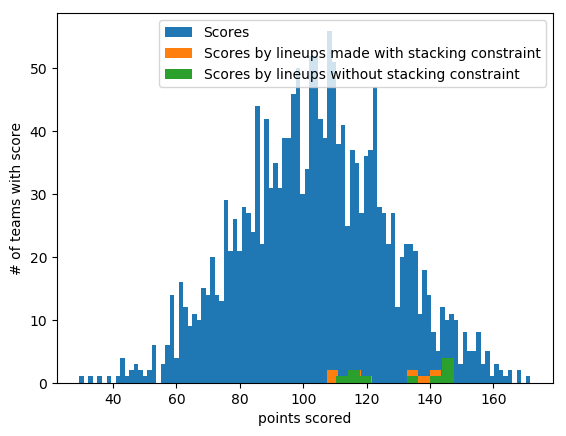

In [172]:
using PyPlot

raw = readcsv("DKresults.csv")
n = length(raw)

# Seperate each lineups score from the greater document
scores = raw[1,16:13:n]
# Scores made by lineup with stacking constraint
stackingScores = [142.45, 117.3, 136.3, 115.45, 143.45, 134.45, 109.3, 121.8, 135.8, 107.45]
# Scores made by line up without stacking constraint
unstackedScores = [133.45, 114.45, 147.45, 145.45, 146.45, 140.45, 116.3, 110.45, 146.45, 118.45]

#Graph
plt[:hist](scores,100, label="Scores")
plt[:hist](stackingScores,10, label="Scores by lineups made with stacking constraint")
plt[:hist](unstackedScores,10, label="Scores by lineups without stacking constraint")
xlabel("points scored")
ylabel("# of teams with score")
legend(loc = "best", fontsize=10); ## legend position

## Findings


# 5. Conclusions
One of the most exciting improvements we can make is developing an additional model to improve the selection of teams to stack. Currently, we are simply using basic Vegas lines, previous information and personal preference to select the teams that will be stacked. There are several datasets we could explore to improve our selection process.
### Draftkings Contest Past Tournament Dataset
After each Draftkings competition is completed, players have the opportunity to download data about the lineups played that night by each competitor with their place and scoring in the competition included. There are two potentially interesting options we can explore with this dataset. First, we can pair this data with other data to backtest our model and determine if our process is successfully generating potentially profitable lineups. Second, there is a small minority of players that take home the majority of Draftkings winnings. We can use the contest data to determine the successful players and explore their lineups to discover their strategies. 
### Donbest.com Dataset
Donbest.com collects the moneyline odds and over/under totals for each MLB game played from various online sportsbooks. With this data, we can explore the correlations between moneylines, totals and placing highly in tournaments. Most Draftkings players will look at totals and moneylines to form opinions about the slate of games that night. Games with higher totals tend to create scenarios where those players are over-valued and over-owned. From here we can explore the tradeoffs between Vegas totals, player ownership and placing highly in Draftkings contests.
### Statcast Dataset
In partnership with Amazon Web Services, every Major League Baseball stadium has been equipped with radar technology that tracks every play. These tools collect data such as exit velocity off the bat and the spin rate of a pitchers fastball. Statistics like these have been revolutionizing the way baseball is played and discovering the predictive value of some of these statistics and incorporating into a model seem like the next logical way to get an advantage over the Draftkings competition.